In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from pandas import DataFrame, Series
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import StaleElementReferenceException
import urllib.request
from PIL import Image
import concurrent.futures
from collections import OrderedDict
import torch
import torch.utils
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
import tensorflow as tf
import cv2
import glob
import os
from skimage import img_as_ubyte

ModuleNotFoundError: No module named 'selenium'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10565803767069456205
xla_global_id: -1
]


In [4]:

print(torch.version.cuda)
cuda_is_ok = torch.cuda.is_available()
print(f"CUDA Enabled: {cuda_is_ok}")
device = torch.device("cuda" if cuda_is_ok else "cpu")

net = nn.Sequential( OrderedDict([ ('fc1', nn.Linear(3,1)) ]) )
net = net.to(device)
print(device,net)

None
CUDA Enabled: False
cpu Sequential(
  (fc1): Linear(in_features=3, out_features=1, bias=True)
)


In [3]:
Base_Aloe_Ferox_Dataset = pd.ExcelFile('BaseSet.xlsx')

In [4]:
Base_Set = {}
for sheet in Base_Aloe_Ferox_Dataset.sheet_names:
    df = Base_Aloe_Ferox_Dataset.parse(sheet)
    Base_Set[sheet] = df

In [5]:
flowers_base = Base_Set["FLOWERS"]
buds_base = Base_Set["BUDS"]
fruit_base = Base_Set["FRUIT"]
No_Evidence_Base = Base_Set["No Evidence"]

In [6]:
flowers_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,field:phenology (foa)
0,9865839,2017-06-24 3:22:22 PM SAST,2017-06-24,2017-06-24 13:22:22 UTC,Africa/Johannesburg,764003,gabriel_15,NaN,2018-02-15 07:32:45 UTC,2018-06-07 16:08:59 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
1,10787160,2011-07-15 00:00:00,2011-07-15,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-07-18 12:28:39 UTC,2018-06-07 16:14:22 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
2,10787636,2011-07-29 00:00:00,2011-07-29,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-08-02 01:09:32 UTC,2018-06-07 16:14:07 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
3,10790153,2011-08-14 00:00:00,2011-08-14,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2011-09-01 07:26:07 UTC,2018-06-07 16:13:47 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
4,10799481,2012-05-26 00:00:00,2012-05-26,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2012-06-15 01:15:18 UTC,2018-08-26 12:02:52 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN


In [7]:
buds_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,8154638,2017/04/30 7:56 AM EDT,2017-04-30,2017-04-30 11:56:00 UTC,Eastern Time (US & Canada),520,johnnybirder,Johnny Wilson,2017-09-28 16:43:38 UTC,2018-06-07 16:12:02 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,9272972,2007/07/01 9:41 AM BST,2007-07-01,2007-07-01 08:41:00 UTC,Europe/London,493784,mark185,Mark Wright,2017-12-27 13:16:33 UTC,2018-06-07 16:09:12 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,9865839,2017-06-24 3:22:22 PM SAST,2017-06-24,2017-06-24 13:22:22 UTC,Africa/Johannesburg,764003,gabriel_15,NaN,2018-02-15 07:32:45 UTC,2018-06-07 16:08:59 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,10787160,2011-07-15 00:00:00,2011-07-15,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-07-18 12:28:39 UTC,2018-06-07 16:14:22 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,10787636,2011-07-29 00:00:00,2011-07-29,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-08-02 01:09:32 UTC,2018-06-07 16:14:07 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


In [8]:
fruit_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,9034202,2017/11/24 2:54 PM SAST,2017-11-24,2017-11-24 12:54:00 UTC,Africa/Johannesburg,389997,shauns,Shaun Swanepoel,2017-12-03 21:28:02 UTC,2018-08-26 11:58:10 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,10832079,2012-10-12 00:00:00,2012-10-12,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2012-11-30 08:16:37 UTC,2018-11-19 09:09:18 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,10871050,2013-07-17 00:00:00,2013-07-17,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2013-07-30 01:59:08 UTC,2018-11-19 09:09:51 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,10875477,2013-09-25 00:00:00,2013-09-25,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2013-10-17 17:28:07 UTC,2018-11-19 09:08:12 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,10962203,2013-09-12 00:00:00,2013-09-12,NaN,Africa/Johannesburg,383144,tonyrebelo,Tony Rebelo,2014-05-03 23:49:34 UTC,2023-10-13 09:04:15 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


In [9]:
No_Evidence_Base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,11111885,2015-05-06 00:00:00,2015-05-06,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2015-05-17 11:20:21 UTC,2023-05-26 11:54:43 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,11197854,2015-11-20 00:00:00,2015-11-20,NaN,Pretoria,711873,benjamin_walton,Benjamin Walton,2016-01-27 11:54:52 UTC,2024-05-27 09:40:27 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,11245126,2017-01-17 00:00:00,2017-01-17,NaN,Africa/Johannesburg,664422,lizegreenieza,Lize van der Merwe,2017-06-12 15:59:45 UTC,2023-09-06 10:04:38 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,20173194,2017-06-24 00:00:00,2017-06-24,NaN,Pretoria,389997,shauns,Shaun Swanepoel,2017-08-16 08:05:05 UTC,2023-09-06 10:04:34 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,27389400,2015/01/07 4:23 AM PST,2015-01-07,2015-01-07 12:23:00 UTC,Pacific Time (US & Canada),1831095,douglasriverside,Douglas J. Long,2019-06-21 18:19:54 UTC,2020-10-11 11:04:47 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


In [10]:
def missing_values(df):
    print(f'Column\t\t\t% missing')
    print(f'{"-"}'*35) 
    return (df.isnull().sum()/len(df)*100
    ).astype(int)

In [11]:
missing_values(flowers_base)

Column			% missing
-----------------------------------


id                                    0
observed_on_string                    0
observed_on                           0
time_observed_at                      7
time_zone                             0
user_id                               0
user_login                            0
user_name                             4
created_at                            0
updated_at                            0
quality_grade                         0
license                               5
url                                   0
image_url                             0
sound_url                           100
tag_list                             93
description                          88
num_identification_agreements         0
num_identification_disagreements      0
captive_cultivated                    0
oauth_application_id                 88
place_guess                           0
latitude                              0
longitude                             0
positional_accuracy                  10


In [12]:
#all null columns or columns with 100% the same value have been removed
useful = ['id','time_observed_at','image_url','num_identification_agreements','latitude','longitude','field:phenology (foa)']

In [13]:
flowers_one= flowers_base[useful]
buds_one = buds_base[useful]
fruit_one = fruit_base[useful]
No_Evidence_one = No_Evidence_Base[useful]

In [14]:
flowers_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
buds_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
fruit_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
No_Evidence_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)

C:\Users\mckyl\AppData\Local\Temp\ipykernel_26376\1159878225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flowers_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
C:\Users\mckyl\AppData\Local\Temp\ipykernel_26376\1159878225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buds_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
C:\Users\mckyl\AppData\Local\Temp\ipykernel_26376\1159878225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [15]:
train_flowers = flowers_one[flowers_one.phenology.isnull()]
train_buds = buds_one[buds_one.phenology.isnull()]
train_fruit = fruit_one[fruit_one.phenology.isnull()]
train_No_Evidence = No_Evidence_one[No_Evidence_one.phenology.isnull()]


In [16]:
test_flowers = flowers_one[flowers_one.phenology.notnull()]
test_buds = buds_one[buds_one.phenology.notnull()]
test_fruit = fruit_one[fruit_one.phenology.notnull()]
test_No_Evidence = No_Evidence_one[No_Evidence_one.phenology.notnull()]

In [17]:
test_flowers.head()
#test_buds.head()
#test_fruit.head()
#test_No_Evidence.head()


,id,time_observed_at,image_url,num_identification_agreements,latitude,longitude,phenology
309,123502268,2022-06-16 06:37:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.250185,26.967054,Flowers & Buds
311,124524639,2022-06-20 13:14:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.068978,27.174663,Flowers & Buds
315,125585296,2022-07-09 13:07:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.452610,26.635715,Flowers
316,125585317,2022-07-09 13:11:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.430468,26.611436,Flowers
321,127508909,2022-07-22 12:27:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.318718,26.670864,Flowers


In [18]:
train_flowers["phenology"]="Flowers"
train_buds["phenology"]="Buds"
train_fruit["phenology"]="Fruit"
train_No_Evidence["phenology"]="No Evidence"

C:\Users\mckyl\AppData\Local\Temp\ipykernel_26376\1268193639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_flowers["phenology"]="Flowers"
C:\Users\mckyl\AppData\Local\Temp\ipykernel_26376\1268193639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_buds["phenology"]="Buds"
C:\Users\mckyl\AppData\Local\Temp\ipykernel_26376\1268193639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [19]:
flowers_one.head()

,id,time_observed_at,image_url,num_identification_agreements,latitude,longitude,phenology
0,9865839,2017-06-24 13:22:22 UTC,https://inaturalist-open-data.s3.amazonaws.com...,3,-33.983704,22.507295,NaN
1,10787160,NaN,https://inaturalist-open-data.s3.amazonaws.com...,6,-33.805170,22.195170,NaN
2,10787636,NaN,https://inaturalist-open-data.s3.amazonaws.com...,6,-33.369140,22.165330,NaN
3,10790153,NaN,https://inaturalist-open-data.s3.amazonaws.com...,4,-33.286420,23.510640,NaN
4,10799481,NaN,https://inaturalist-open-data.s3.amazonaws.com...,9,-33.835280,22.338470,NaN


In [20]:
Test_set = pd.concat([test_flowers, test_buds, test_fruit, test_No_Evidence], axis=0)
Train_set = pd.concat([train_flowers, train_buds, train_fruit, train_No_Evidence], axis=0)


In [21]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1862 entries, 0 to 620
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1862 non-null   int64  
 1   time_observed_at               1752 non-null   object 
 2   image_url                      1862 non-null   object 
 3   num_identification_agreements  1862 non-null   int64  
 4   latitude                       1862 non-null   float64
 5   longitude                      1862 non-null   float64
 6   phenology                      1862 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 116.4+ KB


In [22]:
missing_values(Train_set)

Column			% missing
-----------------------------------


id                               0
time_observed_at                 5
image_url                        0
num_identification_agreements    0
latitude                         0
longitude                        0
phenology                        0
dtype: int32

In [23]:
Train_set = Train_set.dropna()

In [24]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1752 entries, 0 to 620
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1752 non-null   int64  
 1   time_observed_at               1752 non-null   object 
 2   image_url                      1752 non-null   object 
 3   num_identification_agreements  1752 non-null   int64  
 4   latitude                       1752 non-null   float64
 5   longitude                      1752 non-null   float64
 6   phenology                      1752 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 109.5+ KB


In [25]:
missing_values(Test_set)

Column			% missing
-----------------------------------


id                               0
time_observed_at                 0
image_url                        0
num_identification_agreements    0
latitude                         0
longitude                        0
phenology                        0
dtype: int32

#Idea to remove all rows not containing a value in phenology column

In [26]:
Train_set.sort_values(by='phenology')

,id,time_observed_at,image_url,num_identification_agreements,latitude,longitude,phenology
200,48666223,2020-05-10 06:33:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,2,-34.174557,22.128637,Buds
191,48222598,2020-05-31 11:15:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.363347,26.685708,Buds
192,48222610,2020-05-31 11:18:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.366855,26.680658,Buds
193,48222639,2020-05-31 11:24:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.373187,26.680728,Buds
194,48222754,2020-05-31 11:57:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.373727,26.680695,Buds
...,...,...,...,...,...,...,...
208,69253150,2021-02-07 13:50:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-34.012658,20.070774,No Evidence
209,69253288,2021-02-07 09:55:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.927523,20.236987,No Evidence
210,69253289,2021-02-06 10:25:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.935738,20.232714,No Evidence
203,68486030,2021-01-03 15:01:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.685891,23.174056,No Evidence


In [27]:
Test_set.sort_values(by='phenology')

,id,time_observed_at,image_url,num_identification_agreements,latitude,longitude,phenology
579,166644311,2023-06-07 07:21:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-32.613075,26.668245,Buds
587,171513321,2023-06-24 09:10:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.281131,26.891480,Buds
586,171513318,2023-06-24 09:10:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.281061,26.888890,Buds
585,171513315,2023-06-24 09:09:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.280775,26.884131,Buds
584,171513300,2023-06-24 09:07:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.282557,26.828702,Buds
...,...,...,...,...,...,...,...
345,125585332,2022-07-09 13:22:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.353508,26.557148,Fruit
447,180815878,2023-08-27 13:30:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.253593,23.564896,Fruit
448,180815900,2023-08-27 13:32:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,2,-33.248670,23.602941,Fruit
399,134433415,2022-08-28 11:22:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,1,-33.770135,22.961783,Fruit


In [28]:
Train_set[Train_set.duplicated()]

,id,time_observed_at,image_url,num_identification_agreements,latitude,longitude,phenology


Our data set has no duplicates


In [29]:
Train_set.describe([x*0.1 for x in range(10)])

,id,num_identification_agreements,latitude,longitude
count,1.752000e+03,1752.000000,1752.000000,1752.000000
mean,7.985997e+07,1.957192,-33.477756,24.051089
std,4.877141e+07,0.988740,0.764707,2.630984
min,8.154638e+06,0.000000,-34.427510,17.954658
0%,8.154638e+06,0.000000,-34.427510,17.954658
10%,3.018651e+07,1.000000,-34.184483,20.706533
20%,3.468171e+07,1.000000,-34.074977,21.643017
30%,4.877061e+07,1.000000,-33.893782,22.114410
40%,5.294418e+07,2.000000,-33.647477,22.401480
50%,5.917360e+07,2.000000,-33.471771,22.999247


In [30]:
Test_set.describe([x*0.1 for x in range(10)])

,id,num_identification_agreements,latitude,longitude
count,6.640000e+02,664.000000,664.000000,664.000000
mean,1.696178e+08,1.293675,-32.940885,25.713149
std,1.654345e+07,0.484657,0.961627,2.473650
min,1.195873e+08,1.000000,-33.833698,21.314178
0%,1.195873e+08,1.000000,-33.833698,21.314178
10%,1.344025e+08,1.000000,-33.521832,22.607768
20%,1.688603e+08,1.000000,-33.501232,22.954928
30%,1.711919e+08,1.000000,-33.474455,23.314697
40%,1.715134e+08,1.000000,-33.387423,26.134647
50%,1.719922e+08,1.000000,-33.292857,26.589494


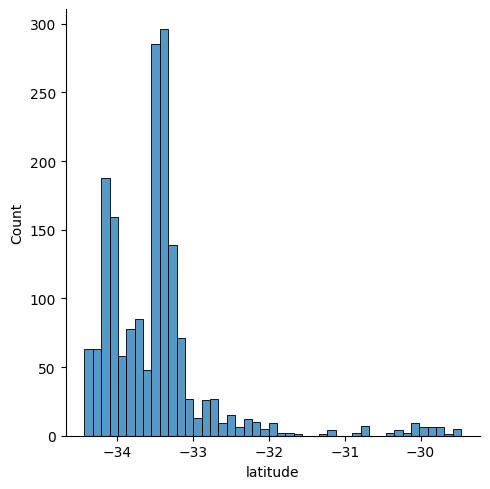

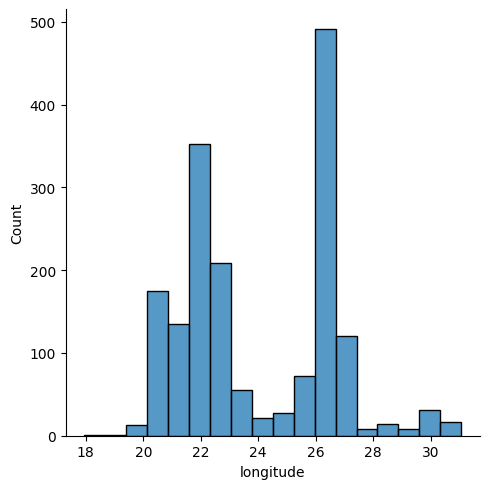

In [31]:
sns.displot(data =Train_set['latitude'])
sns.displot(data =Train_set['longitude'])

In [32]:
print(Test_set.index)


Index([309, 311, 315, 316, 321, 322, 333, 342, 344, 345,
       ...
       548, 551, 552, 553, 554, 555, 556, 557, 558, 579],
      dtype='int64', length=664)


In [33]:
Train_set = Train_set.reset_index(drop=True)
Test_set = Test_set.reset_index(drop=True)


In [34]:
Test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             664 non-null    int64  
 1   time_observed_at               664 non-null    object 
 2   image_url                      664 non-null    object 
 3   num_identification_agreements  664 non-null    int64  
 4   latitude                       664 non-null    float64
 5   longitude                      664 non-null    float64
 6   phenology                      664 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 36.4+ KB


In [35]:
# to run Chrome in headless mode
#options = Options()
#options.add_argument("--headless") # comment while developing

# initialize a Chrome WerbDriver instance
# with the specified options


Train_urls =[]

for i in range(len(Train_set)):
    Train_urls.append(Train_set['image_url'][i])
    

Test_urls = []
for i in range(len(Test_set)):
    Test_urls.append(Test_set['image_url'][i])
    

In [36]:
print(Train_urls)

['https://inaturalist-open-data.s3.amazonaws.com/photos/13517650/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/18084556/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/18111439/medium.jpg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/19794561/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/19854109/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/21001090/medium.jpg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/21256567/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/28682854/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/38697975/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/39276963/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/39770422/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/39771033/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/40163826/m

In [37]:
print(Test_urls)

['https://inaturalist-open-data.s3.amazonaws.com/photos/209222696/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/211059585/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/212978755/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/212979003/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/216261141/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/216404069/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/234224870/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/283294826/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/285313527/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/288558484/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/288558999/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/288583435/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/pho

make dir photos

In [38]:
missing_values(Train_set)

Column			% missing
-----------------------------------


id                               0
time_observed_at                 0
image_url                        0
num_identification_agreements    0
latitude                         0
longitude                        0
phenology                        0
dtype: int32

In [39]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1752 non-null   int64  
 1   time_observed_at               1752 non-null   object 
 2   image_url                      1752 non-null   object 
 3   num_identification_agreements  1752 non-null   int64  
 4   latitude                       1752 non-null   float64
 5   longitude                      1752 non-null   float64
 6   phenology                      1752 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 95.9+ KB


In [40]:
print(Test_urls)

['https://inaturalist-open-data.s3.amazonaws.com/photos/209222696/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/211059585/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/212978755/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/212979003/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/216261141/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/216404069/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/234224870/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/283294826/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/285313527/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/288558484/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/288558999/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/288583435/medium.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/pho

In [ ]:

def download_image(image_url, image_name_counter):
    file_name = f"./Test/{image_name_counter}.png"
    print(f"downloading image no. {image_name_counter} ...")
    
    # download the image
    urllib.request.urlretrieve(image_url, file_name)
    
    print(f"images downloaded successfully to \"{file_name}\"\n")

# Use ThreadPoolExecutor to download images concurrently
image_name_counter = 1
with concurrent.futures.ThreadPoolExecutor() as executor:
    # submit each download task to the executor
    futures = [executor.submit(download_image, image_url, idx) 
               for idx, image_url in enumerate(Test_urls, start=1)]

    # wait for all the tasks to complete
    for future in concurrent.futures.as_completed(futures):
        future.result()  # to raise any exception if occurred

downloading image no. 1 ...
downloading image no. 2 ...
downloading image no. 3 ...
downloading image no. 4 ...
downloading image no. 5 ...
downloading image no. 6 ...
downloading image no. 7 ...
downloading image no. 8 ...
downloading image no. 9 ...
downloading image no. 10 ...
downloading image no. 11 ...
downloading image no. 12 ...
downloading image no. 13 ...
downloading image no. 14 ...
downloading image no. 15 ...
downloading image no. 16 ...
downloading image no. 17 ...
downloading image no. 18 ...
downloading image no. 19 ...
downloading image no. 20 ...
images downloaded successfully to "./Test/17.png"

downloading image no. 21 ...
images downloaded successfully to "./Test/8.png"

downloading image no. 22 ...
images downloaded successfully to "./Test/7.png"

downloading image no. 23 ...
images downloaded successfully to "./Test/2.png"

downloading image no. 24 ...
images downloaded successfully to "./Test/20.png"

downloading image no. 25 ...
images downloaded successfully t

In [47]:
Train_set.head()

,id,time_observed_at,image_url,num_identification_agreements,latitude,longitude,phenology
0,9865839,2017-06-24 13:22:22 UTC,https://inaturalist-open-data.s3.amazonaws.com...,3,-33.983704,22.507295,Flowers
1,12525220,2018-05-10 20:35:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,3,-34.123130,22.085510,Flowers
2,12539218,2008-07-11 09:40:00 UTC,https://inaturalist-open-data.s3.amazonaws.com...,3,-29.825724,30.541581,Flowers
3,13480368,2018-06-15 10:24:09 UTC,https://inaturalist-open-data.s3.amazonaws.com...,3,-33.319705,26.513202,Flowers
4,13513780,2018-06-17 12:44:22 UTC,https://inaturalist-open-data.s3.amazonaws.com...,4,-33.254081,26.450610,Flowers


In [48]:


# Define a function to download an image
def download_image(image_url, image_name_counter):
    file_name = f"./Train/{image_name_counter}.png"
    print(f"downloading image no. {image_name_counter} ...")
    
    # download the image
    urllib.request.urlretrieve(image_url, file_name)
    
    print(f"images downloaded successfully to \"{file_name}\"\n")

# Use ThreadPoolExecutor to download images concurrently
image_name_counter = 1
with concurrent.futures.ThreadPoolExecutor() as executor:
    # submit each download task to the executor
    futures = [executor.submit(download_image, image_url, idx) 
               for idx, image_url in enumerate(Train_urls, start=1)]

    # wait for all the tasks to complete
    #for future in concurrent.futures.as_completed(futures):
        #future.result()  


#The dataset is currently not downloading some files. Like 716 is not downloading.

downloading image no. 1 ...
downloading image no. 2 ...
downloading image no. 3 ...
downloading image no. 4 ...
downloading image no. 5 ...
downloading image no. 6 ...
downloading image no. 7 ...
downloading image no. 8 ...
downloading image no. 9 ...
downloading image no. 10 ...
downloading image no. 11 ...
downloading image no. 12 ...
downloading image no. 13 ...
downloading image no. 14 ...
downloading image no. 15 ...
downloading image no. 16 ...
downloading image no. 17 ...
downloading image no. 18 ...
downloading image no. 19 ...
downloading image no. 20 ...
images downloaded successfully to "./Train/3.png"

downloading image no. 21 ...
images downloaded successfully to "./Train/15.png"

downloading image no. 22 ...
images downloaded successfully to "./Train/11.png"

downloading image no. 23 ...
images downloaded successfully to "./Train/18.png"

downloading image no. 24 ...
images downloaded successfully to "./Train/17.png"

downloading image no. 25 ...
images downloaded success

In [46]:
class_names = ['flowers', 'buds', 'fruits', 'No Evidence', 'flowers and fruits', 'flowers and buds', 'buds and fruits','flowers, fruits and buds']  

In [47]:

#Change to len(Train_set) and len(Test_set) in range
Train_labels = []
Test_Labels = []
for i in range(len(Train_set)):
    Train_labels.append(Train_set['phenology'][i])

for i in range(len(Test_set)):
    Test_Labels.append(Test_set['phenology'][i])

print(Test_Labels)




['Flowers & Buds', 'Flowers & Buds', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Flowers', 'Buds', 'Buds', 'Buds & Flowers']


Image Preproccessing

In [48]:
Test_image_list = []
Train_image_list = []
SIZE = 512
#Change path back to main folders
path_test = r".\Test_mini\*.png"
path_train = r".\Train_mini\*.png"

for file in glob.glob(path_test):
    img_test = cv2.imread(file)
    img_test = cv2.resize(img_test, (SIZE,SIZE))
    img_grey = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
    img_normalized = cv2.normalize(img_grey, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    Test_image_list.append(img_normalized)

for file in glob.glob(path_train):
    img_train = cv2.imread(file)
    img_train = cv2.resize(img_train, (SIZE,SIZE))
    img_grey = cv2.cvtColor(img_train, cv2.COLOR_BGR2GRAY)
    img_normalized = cv2.normalize(img_grey, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    Train_image_list.append(img_normalized)

Test_image_list = np.array(Test_image_list)
Train_image_list  = np.array(Train_image_list)



In [49]:
Test_image_list

array([[[0.952     , 0.952     , 0.952     , ..., 0.93200004,
         0.93200004, 0.93600005],
        [0.952     , 0.952     , 0.952     , ..., 0.94000006,
         0.94000006, 0.94000006],
        [0.952     , 0.952     , 0.952     , ..., 0.94400007,
         0.94400007, 0.94400007],
        ...,
        [0.56      , 0.58400005, 0.528     , ..., 0.688     ,
         0.70400006, 0.72      ],
        [0.632     , 0.568     , 0.48800004, ..., 0.68      ,
         0.66400003, 0.70000005],
        [0.69200003, 0.544     , 0.46800002, ..., 0.68      ,
         0.628     , 0.68      ]],

       [[0.7659574 , 0.7659574 , 0.7553191 , ..., 0.8031915 ,
         0.8031915 , 0.8085106 ],
        [0.7606383 , 0.7606383 , 0.7553191 , ..., 0.8031915 ,
         0.8031915 , 0.8085106 ],
        [0.7659574 , 0.7659574 , 0.7606383 , ..., 0.8031915 ,
         0.8031915 , 0.8085106 ],
        ...,
        [0.45744678, 0.5478723 , 0.5585106 , ..., 0.48404253,
         0.45212764, 0.4468085 ],
        [0.4

In [50]:
Train_image_list

array([[[0.32365146, 0.60580915, 0.53526974, ..., 0.4481328 ,
         0.44398344, 0.36099586],
        [0.38589212, 0.6307054 , 0.6182573 , ..., 0.4854772 ,
         0.49792534, 0.46473032],
        [0.47717845, 0.65975106, 0.7095436 , ..., 0.526971  ,
         0.54771787, 0.58506227],
        ...,
        [0.3692946 , 0.46473032, 0.57261413, ..., 0.39834028,
         0.15767635, 0.05394191],
        [0.526971  , 0.57261413, 0.5394191 , ..., 0.41078842,
         0.20331952, 0.05394191],
        [0.66390043, 0.6846473 , 0.49377596, ..., 0.41078842,
         0.24066392, 0.05809129]],

       [[0.79365087, 0.79365087, 0.79365087, ..., 0.49603176,
         0.484127  , 0.44841272],
        [0.78968257, 0.78968257, 0.79365087, ..., 0.4246032 ,
         0.37698415, 0.30952382],
        [0.7857143 , 0.7857143 , 0.7857143 , ..., 0.3293651 ,
         0.25      , 0.19047621],
        ...,
        [0.36111113, 0.22619049, 0.12698413, ..., 0.11111112,
         0.11904763, 0.11904763],
        [0.2

In [51]:



transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]
)

batch_size = 64
class CustomImageDataset(Dataset):
    def __init__(self, image_list, label_list, transform=None):
        self.image_list = image_list
        self.label_list = label_list
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = self.image_list[idx]
        label = self.label_list[idx]  # Get the corresponding label
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image, label


In [52]:
trainloader = torch.utils.data.DataLoader(
    CustomImageDataset(Train_image_list, Train_labels, transform=transform),
    batch_size=batch_size, shuffle=True, num_workers=4
)

testloader = torch.utils.data.DataLoader(
    CustomImageDataset(Test_image_list, Test_Labels, transform=transform),
    batch_size=batch_size, shuffle=True, num_workers=4
)


In [53]:


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [54]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#added scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=10, gamma=0.1)

In [ ]:
from torch.cuda.amp import GradScaler, autocast

scaler = GradScaler()
for epoch in range(2):

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        with autocast():
            outputs = net(inputs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        #loss.backward()
        #optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    scheduler.step()

print('Finished Training')

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

In [ ]:
cv2.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{class_names[labels[j]]:5s}' for j in range(4)))

In [ ]:
PATH = './Aloe_Model_V1.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

In [ ]:
outputs = net(images)